# BIOEE 4940 : **Introduction to Quantitative Analysis in Ecology**
### ***Spring 2021***
### Instructor: **Xiangtao Xu** ( ✉️ xx286@cornell.edu)
### Teaching Assistant: **Yanqiu (Autumn) Zhou** (✉️ yz399@cornell.edu)

---

## <span style="color:royalblue">Lecture 10</span> *Clustering and Classification*


#### 1. Goals of Clustering and Classification

* Clustering = Unsupervised Learning = Unlabelled Data

    * Emerging Patterns
    * Data Exploration

* Classification = Supervised Learning = (Partly) Labelled Data

    * Extrapolation/Interpolation
    * Spatial/Temporal Scaling


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

(23, 588)


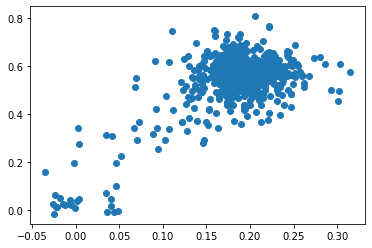

In [2]:
# load Ithaca EVI data
df_evi = pd.read_csv('../Lecture9/data/EVI_Ithaca_ST.csv')
print(df_evi.shape)

plt.scatter(df_evi.values[5,:],df_evi.values[13,:])

In [3]:
# GLOPNET Data
df_glopnet = pd.read_csv('../Lecture9/data/GLOPNET.csv')
df_glopnet.columns

Index(['Code', 'Dataset', 'BIOME', 'Species', 'GF', 'Decid/E'green',
       'Needle/Broad lf', 'C3C4', 'N2-fixer', 'log LL', 'log LMA', 'log Nmass',
       'log Narea', 'log Pmass', 'log Parea', 'log Amass', 'log Aarea',
       'log Gs', 'log Rdmass', 'log Rdarea', 'Ca - Ci'],
      dtype='object')

<AxesSubplot:xlabel='log LMA', ylabel='log Aarea'>

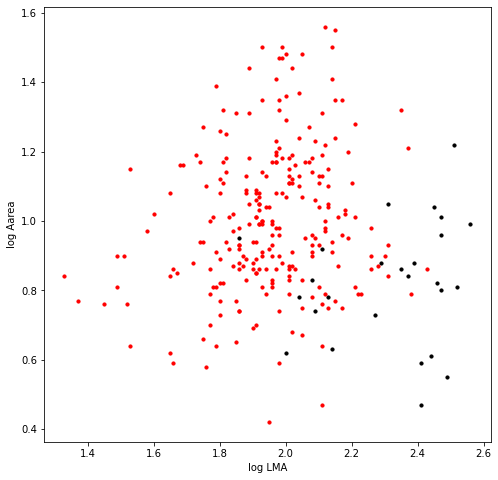

In [4]:
fig, ax= plt.subplots(1,1,figsize=(8,8))

df_plot = df_glopnet[df_glopnet['BIOME'].isin(['BOREAL','TEMP_FOR'])][['log LMA','log Aarea','Needle/Broad lf']].dropna()
df_plot = df_plot.assign(Is_Needle=df_plot['Needle/Broad lf'] == 'N')

df_plot.query('Is_Needle == True').plot.scatter(x='log LMA',y='log Aarea',s=10,c='k',ax=ax)
df_plot.query('Is_Needle == False').plot.scatter(x='log LMA',y='log Aarea',s=10,c='r',ax=ax)

In [5]:
# BAAD data

# import packages and read the data

import pandas as pd
import numpy as np


baad_data_url = 'https://raw.githubusercontent.com/xiangtaoxu/QuantitativeEcology/main/Lab1/baad_data.csv'
baad_dictionary_url = 'https://raw.githubusercontent.com/xiangtaoxu/QuantitativeEcology/main/Lab1/baad_dictionary.csv'

df_data = pd.read_csv(baad_data_url, encoding='latin_1') # can also read local files
df_dict = pd.read_csv(baad_dictionary_url, encoding='latin_1')

In [6]:
df_baad = df_data[df_data.vegetation.isin(['BorF','TempF'])][['species','pft','r.st','ma.ilf']].dropna().drop_duplicates()
df_baad = df_baad.rename(columns={'r.st' : 'wd', 'ma.ilf' : 'lma'})

<AxesSubplot:xlabel='wd', ylabel='lma'>

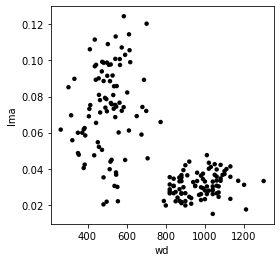

In [7]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

df_baad.plot.scatter(x='wd',y='lma',s=20,c='k',edgecolor='none',ax=ax)



In [8]:
np.sum(np.isnan(df_baad.lma.values))

0

#### 2. Clustering: K-means and DBSCAN

* Key idea -> search emerging data clusters based on neighbouring distance

* Do not require data to be labelled

* **2.1 K-means**

    Separate data into *n* (an input number) groups by choosing centroids that minimize the within-cluster sum-of-squares criterion (variance).
    
    * sensitive to data standardization --> changes variance
    * High-dimensional data is recommended to go through dimension reduction (e.g. PCA) first to improve speed and performance
    * need to specify the number of groups (subjective)
    
    

[[5.01499847e+02 7.37595000e-02]
 [9.71246189e+02 3.12686120e-02]]
[[8.43929465e+02 3.61735159e-02]
 [1.04923077e+03 3.22723077e-02]
 [4.87875756e+02 7.35456009e-02]]
[[5.66371340e+02 7.63933747e-02]
 [1.05708333e+03 3.22108333e-02]
 [4.16667895e+02 7.03152023e-02]
 [8.75427981e+02 3.02168300e-02]]


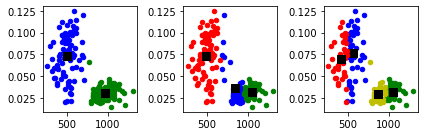

In [9]:
# example on the relatively well-behaved df_baad
from sklearn.cluster import KMeans

X = df_baad[['wd','lma']].values

color_list = ['b','g','r','y','k']

fig, axes = plt.subplots(1,3,figsize=(3*2,2))
for i, nc in enumerate(range(2,4+1)):
    
    
    # try 2 - 4 groups
    kmeans = KMeans(n_clusters=nc, random_state=0).fit(X)
    
    # center of each kmean
    print(kmeans.cluster_centers_)
    
    # get label
    labels = kmeans.labels_
    
    # plot
    ax = axes[i]
    for il, label in enumerate(np.unique(labels)):
        label_mask = labels == label
        ax.scatter(X[label_mask,0],X[label_mask,1],s=20,c=color_list[il],label=label)
        ax.scatter(kmeans.cluster_centers_[il,0],kmeans.cluster_centers_[il,1],
                   s=50,c='k',marker='s')

fig.tight_layout()
plt.show()

* **2.2 DBSCAN**
    
    Density-Based Spatial Clustering of Applications with Noise.

    DBSCAN views the data space in terms of high-density/low-density area. Connected high-density area (assessed by some distance measurres) constitutes a cluster.
    
    Find the optimal number of clusters (no need to specify a priori) based on two parameters: min_sample --> how dense each area should be, and eps --> how close each high-density area should be in order to be clustered.
    
    * Number of groups will emerge from the data (not necessarily the number you want!)
    * Can deal with complex-shaped grouping
    * Treat some outliers as noise
    * Computationally more expensive
    

[-1  0  1  2  3  4  5  6]
[0 1]
[0]


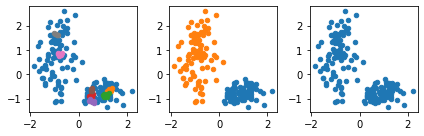

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = df_baad[['wd','lma']].values
X = StandardScaler().fit_transform(X)
#color_list = ['b','g','r','y','k']

eps_list = [0.1,0.5,1.]
fig, axes = plt.subplots(1,3,figsize=(3*2,2))
for i, eps in enumerate(eps_list):
    # try different eps
    dbscan = DBSCAN(eps=eps, min_samples=5).fit(X)
    labels = dbscan.labels_
    print(np.unique(labels))

    
    # plot
    ax = axes[i]
    for il, label in enumerate(np.unique(labels)):
        label_mask = labels == label
        ax.scatter(X[label_mask,0],X[label_mask,1],s=20,label=label)

fig.tight_layout()
plt.show()




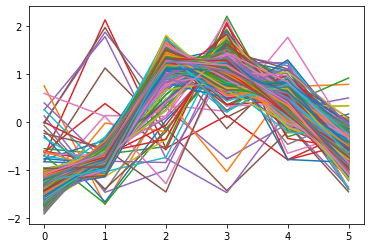

In [15]:
# try both kmean and DBSCAN to the EVI data
from sklearn.preprocessing import StandardScaler

df_evi = pd.read_csv('../Lecture9/data/EVI_Ithaca_ST.csv')

X = df_evi.values[1::4,:] # every 4 sampling time
X = StandardScaler().fit_transform(X)

# treat each time as a feature/dimension
X = X.T

# standardize X


plt.plot(X.T)
plt.show()

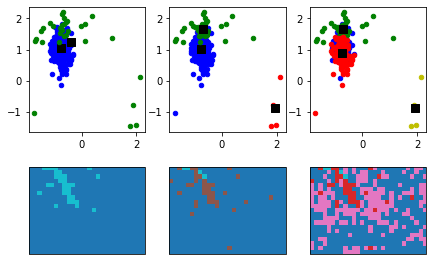

In [19]:
# visualization of EVI in JUL
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import rasterio
import matplotlib.pyplot as plt
%matplotlib inline

filename = '../Lecture9/data/2019_07_12.tif'
src = rasterio.open(filename, 'r')
im = src.read()
# read image into ndarray

# transpose the array from (band, row, col) to (row, col, band)
im = np.transpose(im, [1,2,0])
# transform to cartopy format, left, right, low, up
img_extent = [src.bounds[0],src.bounds[2],src.bounds[1],src.bounds[3]]

# define cartopy crs for the raster, based on rasterio metadata
crs = ccrs.PlateCarree()


color_list = ['b','g','r','y','k']

fig = plt.figure(figsize=(3*2,2*2))
for i, nc in enumerate(range(2,4+1)):
    
    
    # try 2 - 4 groups
    kmeans = KMeans(n_clusters=nc, random_state=0).fit(X)
    
    
    # get label
    labels = kmeans.labels_
    
    # plot scatter plot
    ax = fig.add_subplot(2,3,i+1)
    for il, label in enumerate(np.unique(labels)):
        label_mask = labels == label
        ax.scatter(X[label_mask,1],X[label_mask,3],s=20,c=color_list[il],label=label)
        ax.scatter(kmeans.cluster_centers_[il,1],kmeans.cluster_centers_[il,3],
                   s=50,c='k',marker='s')

    ax = fig.add_subplot(2,3,(i+1) + 3,projection=crs)
    him = plt.imshow(np.reshape(labels,im.shape[0:2]), 
                 origin='upper',extent=img_extent, 
                 transform=crs, interpolation='nearest',
                 cmap=plt.get_cmap('tab10'))
    # plot spatial pattern of label
    # add grid lines
    #hg = ax.gridlines(draw_labels=True)
    #hg.right_labels = False
    
fig.tight_layout()
plt.show()

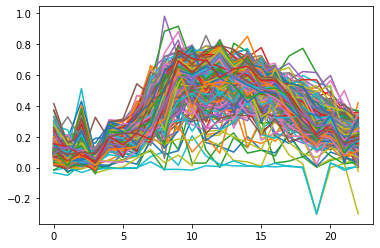

In [31]:
# each grid cell is ~ 0.9km
plt.plot(df_evi.values[:,labels==0])
plt.show()

[-1  0]
[-1  0]
[-1  0]


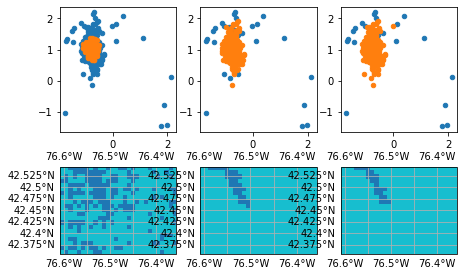

In [27]:
# visualization of EVI in JUL
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import rasterio
import matplotlib.pyplot as plt
%matplotlib inline

filename = '../Lecture9/data/2019_07_12.tif'
src = rasterio.open(filename, 'r')
im = src.read()
# read image into ndarray

# transpose the array from (band, row, col) to (row, col, band)
im = np.transpose(im, [1,2,0])
# transform to cartopy format, left, right, low, up
img_extent = [src.bounds[0],src.bounds[2],src.bounds[1],src.bounds[3]]

# define cartopy crs for the raster, based on rasterio metadata
crs = ccrs.PlateCarree()


color_list = ['b','g','r','y','k']

fig = plt.figure(figsize=(3*2,2*2))

eps_list = [0.2,0.6,0.8]
for i, eps in enumerate(eps_list):
    # try different eps
    dbscan = DBSCAN(eps=eps, min_samples=10).fit(X)
    labels = dbscan.labels_
    print(np.unique(labels))
    # plot scatter plot
    ax = fig.add_subplot(2,3,i+1)
    for il, label in enumerate(np.unique(labels)):
        label_mask = labels == label
        ax.scatter(X[label_mask,1],X[label_mask,3],s=20,label=label)
        

    ax = fig.add_subplot(2,3,(i+1) + 3,projection=crs)
    him = plt.imshow(np.reshape(labels,im.shape[0:2]), 
                 origin='upper',extent=img_extent, 
                 transform=crs, interpolation='nearest',
                 cmap=plt.get_cmap('tab10'))
    # plot spatial pattern of label
    # add grid lines
    hg = ax.gridlines(draw_labels=True)
    hg.right_labels = False
    
fig.tight_layout()
plt.show()

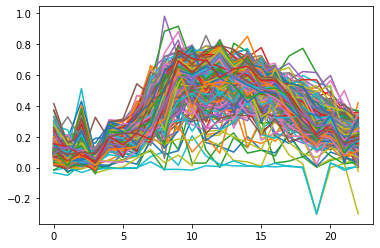

In [29]:
# each grid cell is ~ 0.9km
plt.plot(df_evi.values[:,labels==0])
plt.show()

* Other Methods and Performance Comparison

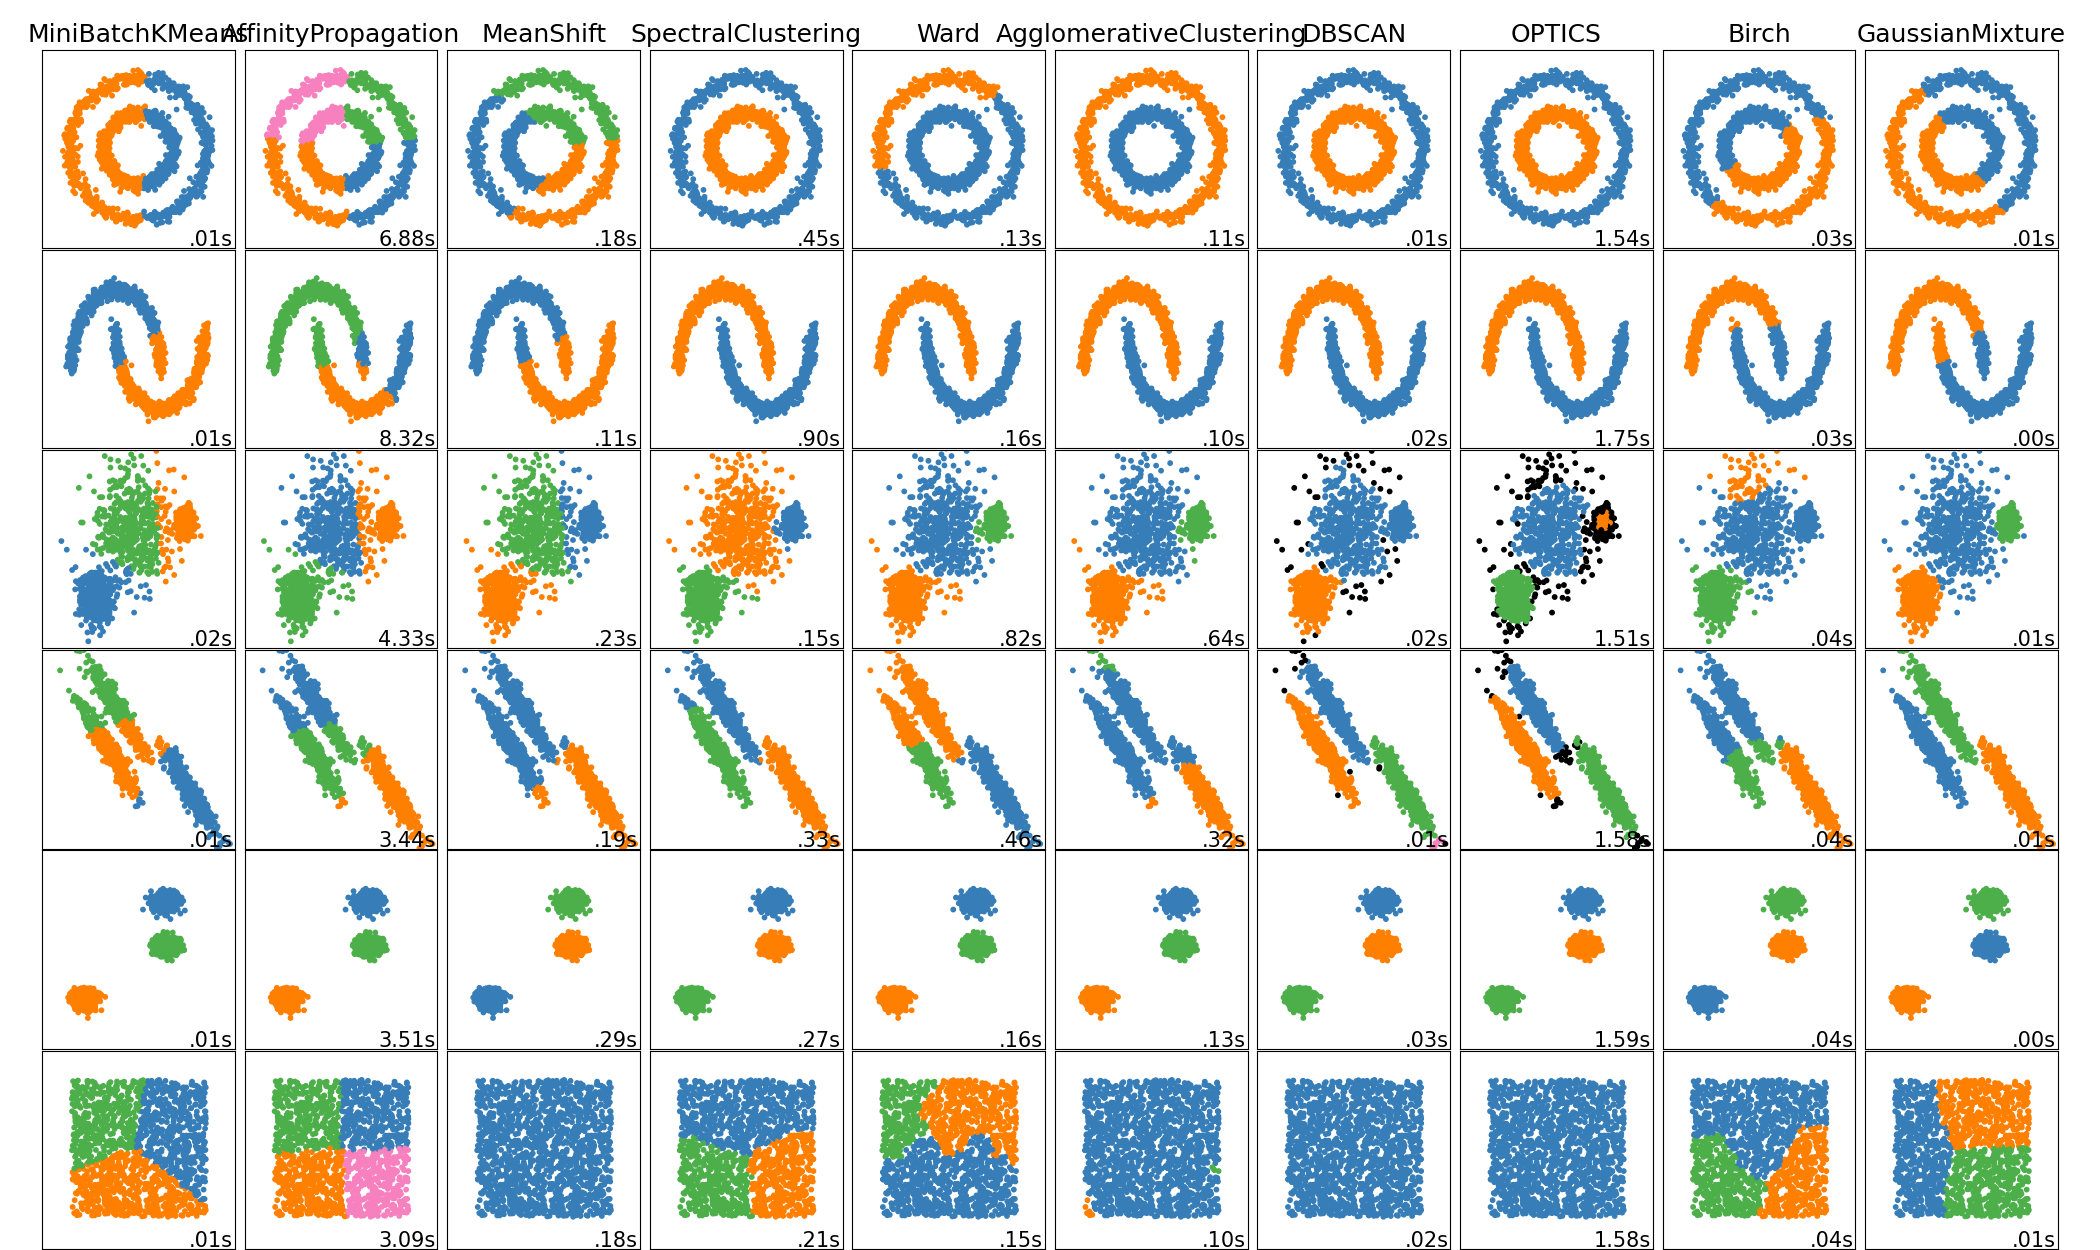

https://scikit-learn.org/stable/modules/clustering.html#clustering

#### 3. Classification:

* Build relationships between known classes/labels (e.g. species, growth form, biome, etc.) with measurements

* Equivalent to categorical variable as dependent variable. (so, Logistic Regression can also be viewed as a classification method)

* **3.1 Linear Discriminant Analysis** (LDA)

    In some sense similar to PCA.
    
    However, LDA aims to find the leading dimensions that maximize difference between classes/labels while PCA does not account for the labels.
    
    Assumes gaussian distribution of input data
    
    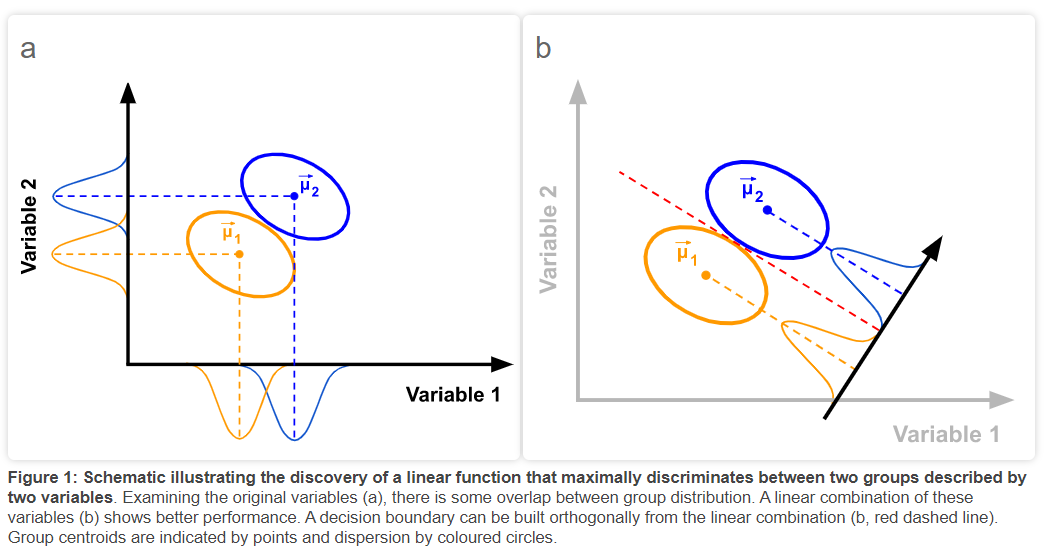
    
    source: https://sites.google.com/site/mb3gustame/discrimination/linear-discriminant-analysis

In [229]:
# GLOPNET Data
df_glopnet = pd.read_csv('../Lecture9/data/GLOPNET.csv')

df_plot = df_glopnet[df_glopnet['BIOME'].isin(['BOREAL','TEMP_FOR'])][['log LMA','log Aarea','log Narea','log LL','Species','Needle/Broad lf']].dropna()
df_plot = df_plot.assign(Is_Needle=df_plot['Needle/Broad lf'] == 'N')
df_plot = df_plot.assign(Genus=[sp.split(' ')[0] for sp in df_plot.Species.values])

genus_list = df_plot.Genus.value_counts()

# only get the first 3 abundant species

df_clf = df_plot[df_plot.Genus.isin(genus_list.index[0:3])]

#X = df_clf[['log LMA','log Aarea','log Narea','log LL']].values
X = df_clf[['log LMA','log Aarea']].values
X = StandardScaler().fit_transform(X)
#y = df_plot['Is_Needle'].values.astype(int)

# convert to integers
y = np.array([np.argwhere(genus_list.index == genus)[0][0] for genus in df_clf.Genus.values])

[0.83410959 0.16589041]


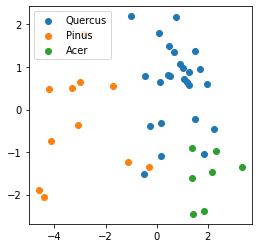

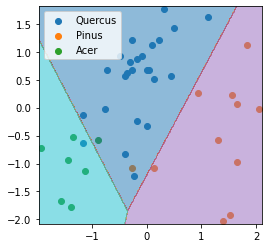

In [236]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis().fit(X,y)

X_lda = lda.transform(X)


# similar to inertia in PCA
print(lda.explained_variance_ratio_)

genus_list = df_plot.Genus.value_counts().index[0:3]

cmap = plt.get_cmap('tab10')(range(3))
fig, ax = plt.subplots(1,1,figsize=(4,4))

for i, genus in enumerate(genus_list):
    ax.scatter(X_lda[df_clf.Genus.values==genus,0],X_lda[df_clf.Genus.values==genus,1]
              ,c=np.reshape(cmap[i],(1,-1)),label=genus)
    

ax.legend()


# original data
fig, ax = plt.subplots(1,1,figsize=(4,4))

for i, genus in enumerate(genus_list):
    ax.scatter(X[df_clf.Genus.values==genus,0],X[df_clf.Genus.values==genus,1]
               ,c=np.reshape(cmap[i],(1,-1)),label=genus)

ax.legend()

# add prediction plane
x_min, x_max = X[:, 0].min() - .05, X[:, 0].max() + .05
y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

predict_traits = np.c_[xx.ravel(), yy.ravel()]
predict_class = lda.predict(predict_traits)
plot_Z = np.reshape(predict_class,xx.shape)

ax.contourf(xx,yy,plot_Z,cmap=plt.get_cmap('tab10'),alpha=0.5)

* **3.2 Support-Vector Machine** (SVM)

    Find a hyper-plane that separates two classes and maximizes the 'distance' of each class to the plane
    
    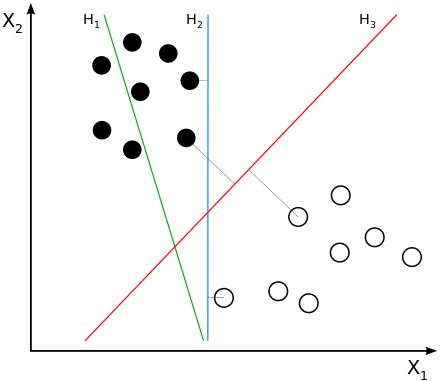
    
    * Effective for high-dimensional dataset
    * Versatile to non-linear separation planes through various kernel functions

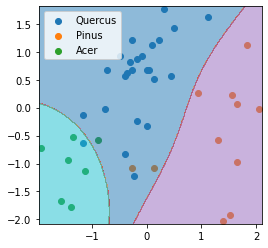

In [237]:
from sklearn.svm import SVC
svm = SVC(gamma='auto').fit(X,y)

# original data
fig, ax = plt.subplots(1,1,figsize=(4,4))

for i, genus in enumerate(genus_list):
    ax.scatter(X[df_clf.Genus.values==genus,0],X[df_clf.Genus.values==genus,1]
               ,c=np.reshape(cmap[i],(1,-1)),label=genus)

ax.legend()

# add prediction plane
x_min, x_max = X[:, 0].min() - .05, X[:, 0].max() + .05
y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

predict_traits = np.c_[xx.ravel(), yy.ravel()]
predict_class = svm.predict(predict_traits)
plot_Z = np.reshape(predict_class,xx.shape)

ax.contourf(xx,yy,plot_Z,cmap=plt.get_cmap('tab10'),alpha=0.5)

* **3.3 Decision Trees and Random Forests**

    Decision Trees are classificaiton methods based on a series of tree-like bi-nomial decisions (True/False).
    
    * Versatile for both numerical/categorical data
    * Easy to interpret
    * Sensitive to noise and training data sets
    * Easy to overfit

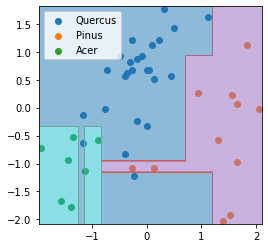

In [238]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


DT = DecisionTreeClassifier().fit(X, y)

# original data
fig, ax = plt.subplots(1,1,figsize=(4,4))

for i, genus in enumerate(genus_list):
    ax.scatter(X[df_clf.Genus.values==genus,0],X[df_clf.Genus.values==genus,1]
               ,c=np.reshape(cmap[i],(1,-1)),label=genus)

ax.legend()

# add prediction plane
x_min, x_max = X[:, 0].min() - .05, X[:, 0].max() + .05
y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

predict_traits = np.c_[xx.ravel(), yy.ravel()]
predict_class = DT.predict(predict_traits)
plot_Z = np.reshape(predict_class,xx.shape)

ax.contourf(xx,yy,plot_Z,cmap=plt.get_cmap('tab10'),alpha=0.5)

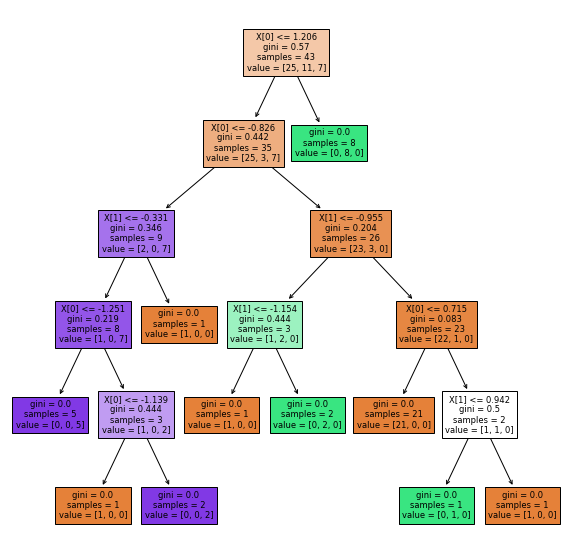

In [241]:
plt.figure(figsize=(10,10))
plot_tree(DT, filled=True)
plt.show()

* Random Forests

    Use an ensemble of Decision Trees (by bootstrapping the data) to reduce overfit and allow for estimates in uncertainty
    
    More generally for Random Forests in Ecology check https://www.fs.fed.us/rm/pubs_journals/2007/rmrs_2007_cutler_r001.pdf

    
    

[0.56862881 0.43137119]


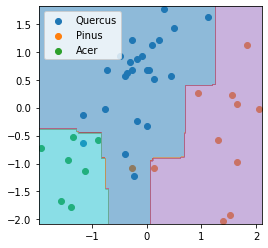

In [247]:
from sklearn.ensemble import RandomForestClassifier
# for Random Forests Regression use RandomForestRegressor

RF = RandomForestClassifier(max_depth=2,random_state=0).fit(X, y)

# original data
fig, ax = plt.subplots(1,1,figsize=(4,4))

for i, genus in enumerate(genus_list):
    ax.scatter(X[df_clf.Genus.values==genus,0],X[df_clf.Genus.values==genus,1]
               ,c=np.reshape(cmap[i],(1,-1)),label=genus)

ax.legend()

# add prediction plane
x_min, x_max = X[:, 0].min() - .05, X[:, 0].max() + .05
y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

predict_traits = np.c_[xx.ravel(), yy.ravel()]
predict_class = RF.predict(predict_traits)
plot_Z = np.reshape(predict_class,xx.shape)

ax.contourf(xx,yy,plot_Z,cmap=plt.get_cmap('tab10'),alpha=0.5)

print(RF.feature_importances_)

More classifiers

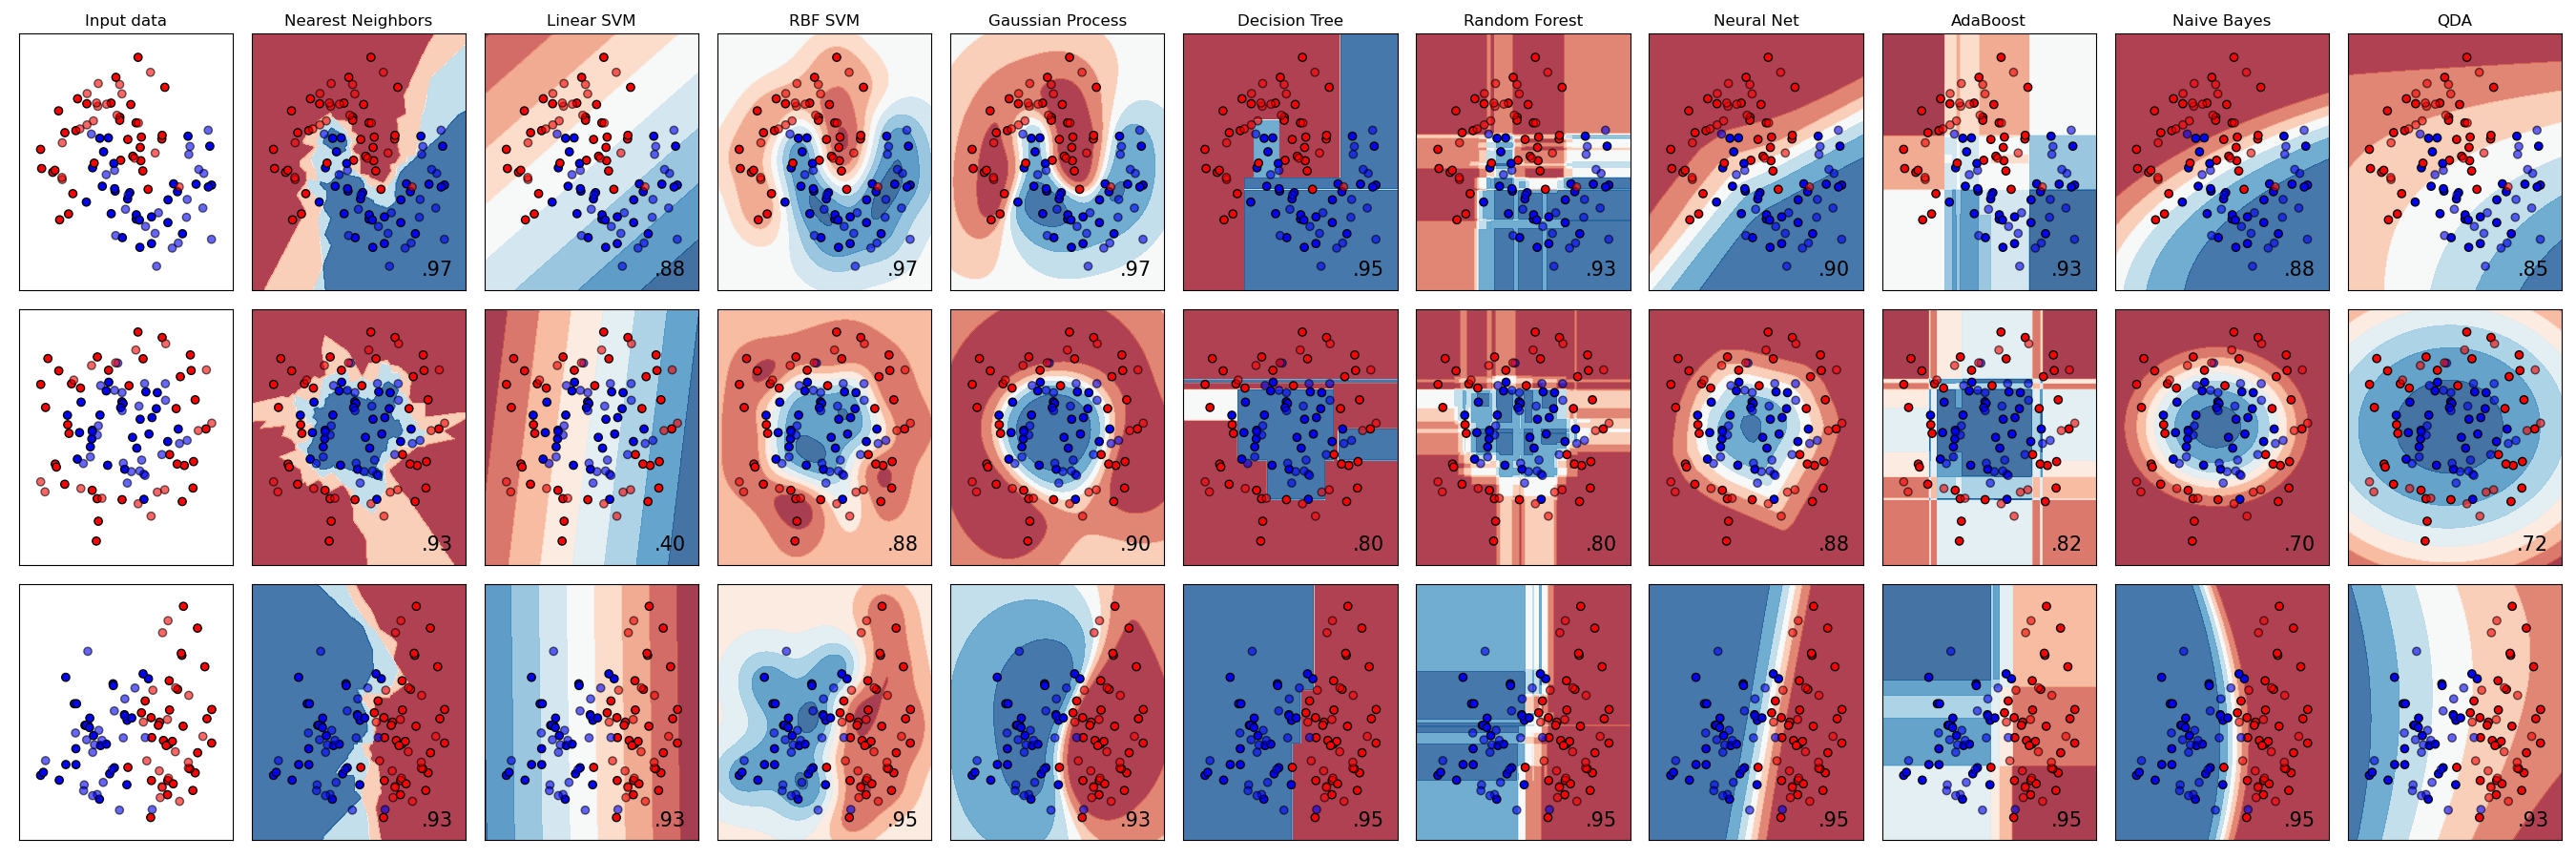

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

#### Summary